<a href="https://colab.research.google.com/github/madhumithaaaaa/Intelligent-Agents-SoC/blob/master/SoC-Assgn2-Code-Madhumitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

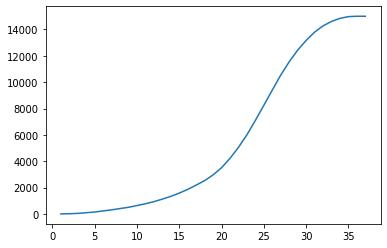

No. of iterations =  38


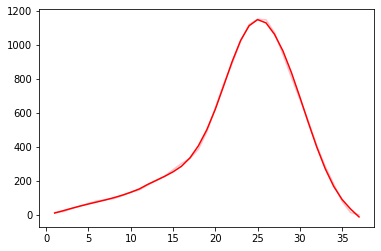

Maximum of dy =  1148.2639504885497


In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

def swap_random(seq):                                                            #function to swap 8 random entries with another 8 random entries
    index_row = range(50)
    arr_row=random.sample(index_row,16)
    index_column = range(300)
    arr_column=random.sample(index_column,16)
    for i in range(8):
        seq[arr_row[i],arr_column[i]], seq[arr_row[i+8],arr_column[i+8]] = seq[arr_row[i+8],arr_column[i+8]], seq[arr_row[i],arr_column[i]]

def conversion(a,i,j):                                                           #function to convert first neighbours(p=0.25) and second neighbours(p=0.08) to 1
    for l in range(5):
        for m in range(5):
            r = np.random.randint(1,100)
            if i+l-2>=0 and i+l-2<=49:
                if j+m-2>=0 and j+m-2<=299:
                    if (l==0 or l==4) or (m==0 or m==4):
                        if r<=8:
                            a[i+l-2,j+m-2]=1
                    else:
                        if r<=25:
                            a[i+l-2,j+m-2]=1
        
a = np.zeros((50,300))                                                           #creating 50 x 300 matrix 
a[25,150]=1                                                                      #setting one position to 1
count = 0
s = [0]
t = [0]

iterations=1
y_axis=[]
x_axis=[]

while count!=15000:
    count=0
    k=0 
    
    swap_random(a)
    for i in range(50):                                                          #storing positions of elements containing 1
        for j in range(300):
            if a[i,j]==1:
                s[k]=i
                t[k]=j
                k+=1
    for item in range(len(s)):                                                   #calling conversion function at all positions containing 1
        i = s[item]
        j = t[item]
        conversion(a,i,j)
                       
    for i in range(50):                                                          #counting no. of 1s in matrix
        for j in range(300):
            if a[i,j]==1:
                count+=1
    s=[0]*count
    t=[0]*count
    
    y_axis.append(count)
    x_axis.append(iterations)
    iterations+=1
    
plt.plot(x_axis,y_axis)                                                          #plotting no. of 1s vs iteration
plt.show()
print('No. of iterations = ', iterations)

y = np.array(y_axis)
dy = np.gradient(y)         
plt.plot(x_axis, dy, color='pink')                                               #plotting gradient of y i.e. dy/dx vs iterations
yhat = savgol_filter(dy, 21, 6)                                                  #using savitzky golay function to fit the gradient graph in a curve
plt.plot(x_axis, yhat, color='red')                                              #plotting fitted curve
plt.show()
print('Maximum of dy = ', max(yhat))                                             #printin peak value of fitted curve

    
